#LabelPropagation
**class sklearn.semi_supervised.LabelPropagation(kernel='rbf', *, gamma=20, n_neighbors=7, max_iter=1000, tol=0.001, n_jobs=None)**


##Parameters:    

1.***kernel : {‘knn’, ‘rbf’} or callable, default=’rbf’***

"String identifier for kernel function to use or the kernel function itself. Only ‘rbf’ and ‘knn’ strings are valid inputs. The function passed should take two inputs, each of shape (n_samples, n_features), and return a (n_samples, n_samples) shaped weight matrix."

2.***gamma : float, default=20***

Parameter for rbf kernel.

3.***n_neighbors :
int, default=7***

Parameter for knn kernel which need to be strictly positive.

4.***max_iter : int, default=1000***

Change maximum number of iterations allowed.

5.***tol : float, default=1e-3***

Convergence tolerance: threshold to consider the system at steady state.

6.***n_jobs : int, default=None***

The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.

In [15]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.semi_supervised import LabelPropagation
from sklearn.neighbors import NearestNeighbors
import networkx as nx

#make_moons
**sklearn.datasets.make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)**

A simple toy dataset to visualize clustering and classification algorithms.

**Parameters:**

1.***n_samples = int or tuple of shape (2,), dtype=int, default=100***

If int, the total number of points generated. If two-element tuple, number of points in each of two moons.


2.***shuffle = bool, default=True***

Whether to shuffle the samples.

3.***noise = float, default=None***

Standard deviation of Gaussian noise added to the data.

4.***random_state = int, RandomState instance or None, default = None***

Determines random number generation for dataset shuffling and noise. Pass an int for reproducible output across multiple function calls.

In [16]:
# Step 1: Generating make_moons synthetic data (moons dataset)
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)


In [17]:
# Step 2: Simulating limited labelling (only 30 labeled instances)
np.random.seed(42)
labels = np.full(y.shape, -1)
random_labeled_points = np.random.choice(len(y), size=30, replace=False)
labels[random_labeled_points] = y[random_labeled_points]

In [18]:
# Step 3: Efficiently building the similarity graph using nearest neighbors (optimization)
n_neighbors = 5
nn_model = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(X)

# Calculating the nearest neighbors graph
k_neighbors_graph = nn_model.kneighbors_graph(X, mode='connectivity')






In [19]:
# Step 4: Perform Label Propagation
label_prop_model = LabelPropagation(kernel='knn', n_neighbors=n_neighbors, max_iter=1000)
label_prop_model.fit(X, labels)
predicted_labels = label_prop_model.transduction_

/usr/local/lib/python3.11/dist-packages/sklearn/semi_supervised/_label_propagation.py:324: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


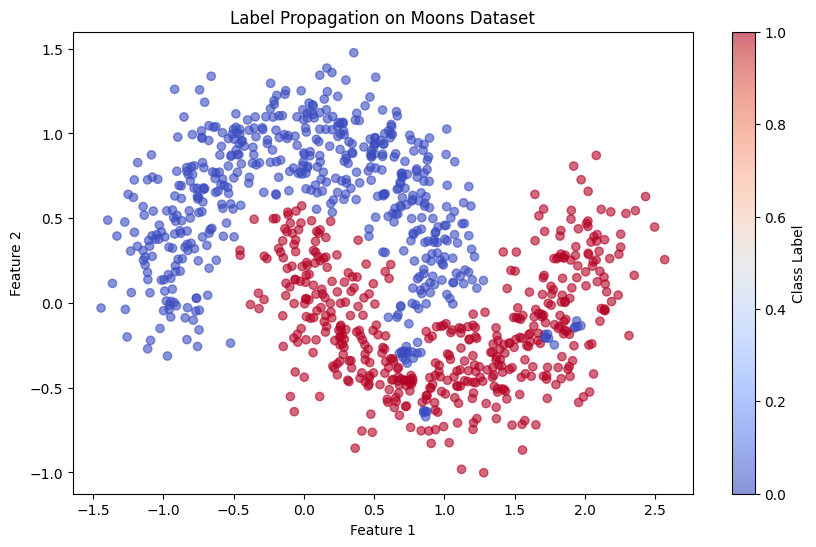

In [20]:
# Step 5: Visualizing Label Propagation Results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='coolwarm', alpha=0.6)
plt.title('Label Propagation on Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter, label='Class Label')
plt.show()



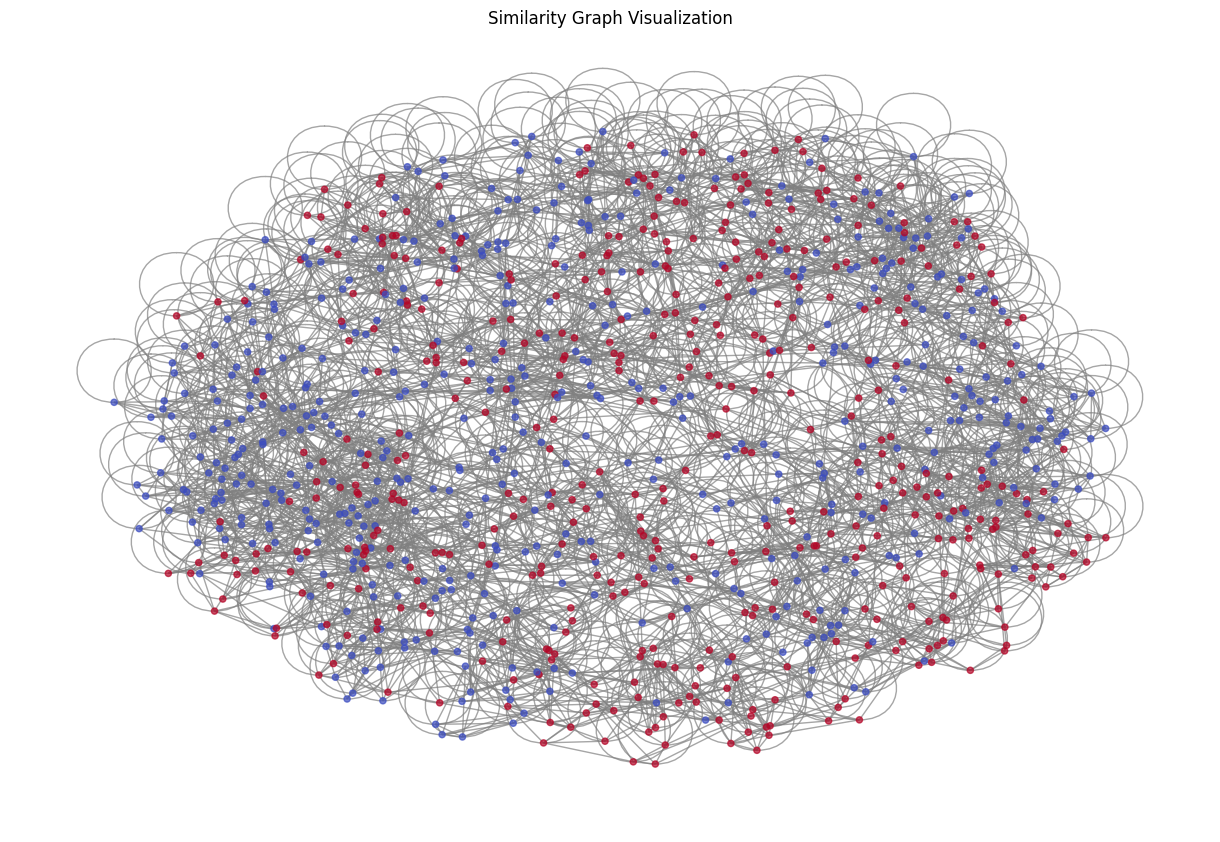

In [21]:
# Step 6: Visualizing the similarity graph
G = nx.from_scipy_sparse_array(k_neighbors_graph)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42, k=0.15)
nx.draw(G, pos, node_size=20, node_color=predicted_labels, cmap='coolwarm', edge_color='grey', alpha=0.7)
plt.title('Similarity Graph Visualization')
plt.show()

For your reference you can visit my github profile for the tutorial ▶  https://github.com/sb24ragnar/label_propagation_tutorial